In [1]:
!pip install tensorflow tensorflow_hub


In [2]:
from google.colab import files

# This will prompt you to upload the zip file from your local machine
uploaded =files.upload()

Saving Dataset Brain Tumor.zip to Dataset Brain Tumor.zip


In [3]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = 'Dataset Brain Tumor.zip'  # Change this if your zip file name is different

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('Dataset Brain Tumor')

# Verify the contents of the unzipped directory
os.listdir('Dataset Brain Tumor')

['Dataset Brain Tumor']

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


# Load training data with augmentation
train_generator = datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical'
)

# Load testing data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical'
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [3]:
# Step 1: Install necessary libraries
!pip install tensorflow tensorflow-addons

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data with augmentation
train_generator = datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset',
    target_size=(224, 224),  # EfficientNetB0 input size
    batch_size=32,
    class_mode='categorical'
)

# Load testing data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset',
    target_size=(224, 224),  # EfficientNetB0 input size
    batch_size=32,
    class_mode='categorical'
)

# Load EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Step 3: Evaluate the best model

# Load the best model based on validation accuracy
best_model = load_model('best_model.h5')

# Evaluate the performance of the best model on the test dataset
evaluation = best_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.
Epoch 1/30


KeyboardInterrupt: 

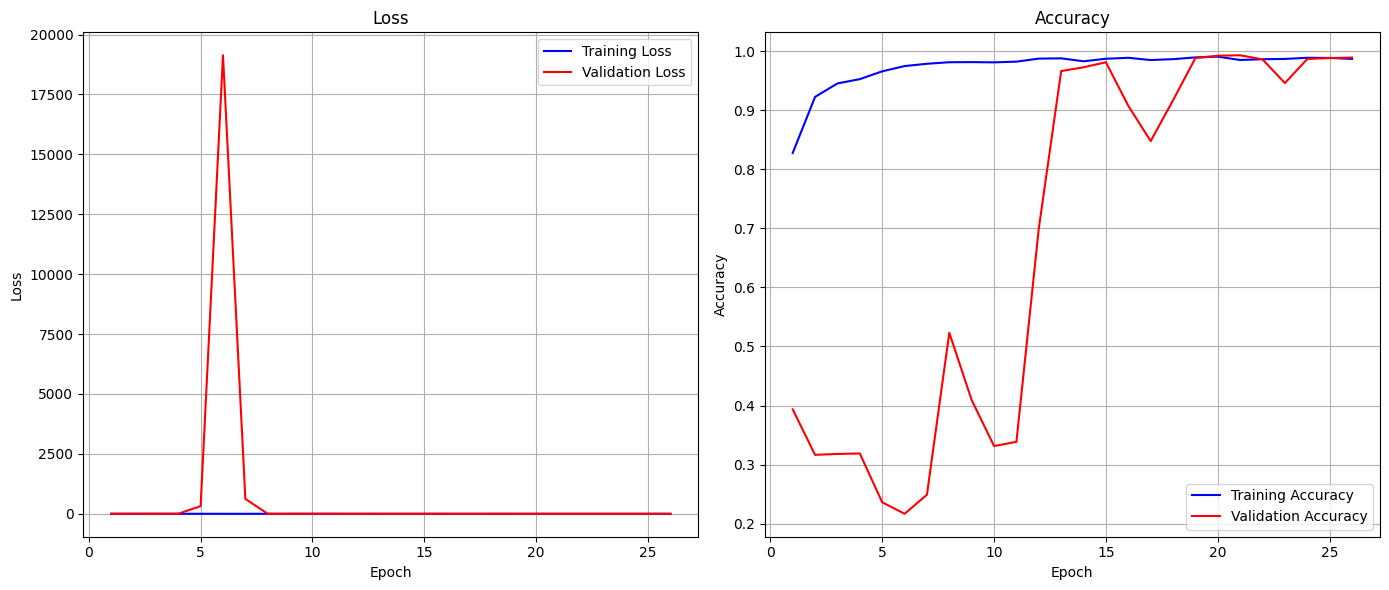

In [4]:
import matplotlib.pyplot as plt

# Epoch numbers
epochs = list(range(1, 27))

# Training and validation loss
train_loss = [1.5845, 1.2270, 1.0798, 0.9670, 0.8581, 0.7579, 0.7021, 0.6801, 0.6612,
              0.6448, 0.6213, 0.6058, 0.6021, 0.6069, 0.5942, 0.5859, 0.5892, 0.5781,
              0.5727, 0.5725, 0.5823, 0.5780, 0.5766, 0.5671, 0.5694, 0.5682]
val_loss = [2.4235, 2.5717, 2.3671, 3.6041, 319.3356, 19135.6738, 620.7191, 1.7922,
            2.0942, 3.0386, 2.4175, 1.3015, 0.6566, 0.6353, 0.6095, 0.8180, 0.9563,
            0.7552, 0.5795, 0.5694, 0.5677, 0.5864, 0.6680, 0.5835, 0.5717, 0.5767]

# Training and validation accuracy
train_accuracy = [0.8274, 0.9224, 0.9452, 0.9525, 0.9657, 0.9746, 0.9785, 0.9811,
                   0.9813, 0.9809, 0.9821, 0.9872, 0.9877, 0.9827, 0.9870, 0.9886,
                   0.9848, 0.9863, 0.9893, 0.9905, 0.9849, 0.9862, 0.9867, 0.9886,
                   0.9884, 0.9867]
val_accuracy = [0.3936, 0.3166, 0.3181, 0.3189, 0.2364, 0.2168, 0.2490, 0.5232,
                 0.4093, 0.3315, 0.3386, 0.6999, 0.9662, 0.9725, 0.9811, 0.9073,
                 0.8476, 0.9167, 0.9882, 0.9921, 0.9929, 0.9859, 0.9458, 0.9866,
                 0.9882, 0.9890]

# Plotting the loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

